In [49]:
# import common libraries

import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [50]:
station_day = pd.read_csv("station_day.csv")

In [51]:
station_day.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,24-11-2017,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,25-11-2017,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,26-11-2017,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,27-11-2017,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,28-11-2017,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [52]:
station_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


In [53]:
station_day.shape

(108035, 16)

In [54]:
station_day.isnull().sum()

StationId         0
Date              0
PM2.5         21625
PM10          42706
NO            17106
NO2           16547
NOx           15500
NH3           48105
CO            12998
SO2           25204
O3            25568
Benzene       31455
Toluene       38702
Xylene        85137
AQI           21010
AQI_Bucket    21010
dtype: int64

In [55]:
station_day_cleaned = station_day.dropna()

In [56]:
station_day_cleaned.shape

(10314, 16)

In [57]:
# ARIMA

In [58]:
arima_df = station_day[['Date','AQI', 'StationId']]

In [59]:
arima_df["Date"]= pd.to_datetime(arima_df["Date"])

In [60]:
# Create a time series object by aggregating "AQI" values at a daily frequency
ts = arima_df.groupby(pd.PeriodIndex(arima_df['Date'], freq="D"))['AQI'].mean()
# ts = arima_df['AQI']
ts.shape

(2009,)

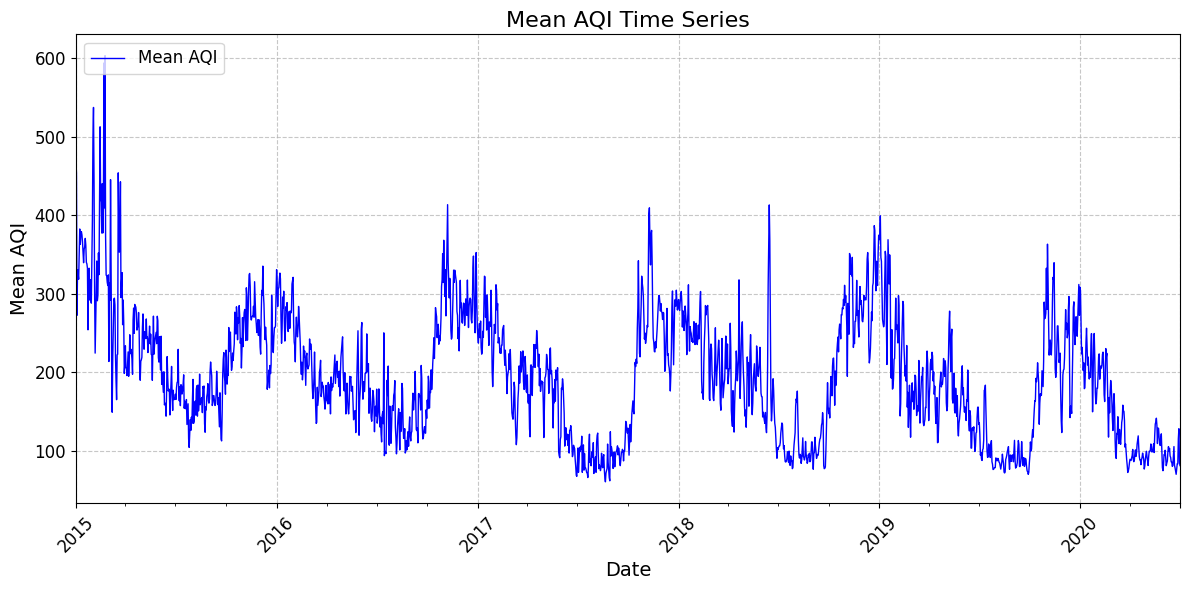

In [61]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

ts.plot(ax=ax, color='blue', linestyle='-', linewidth=1)

ax.set_title('Mean AQI Time Series', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Mean AQI', fontsize=14)

ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(['Mean AQI'], loc='upper left', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


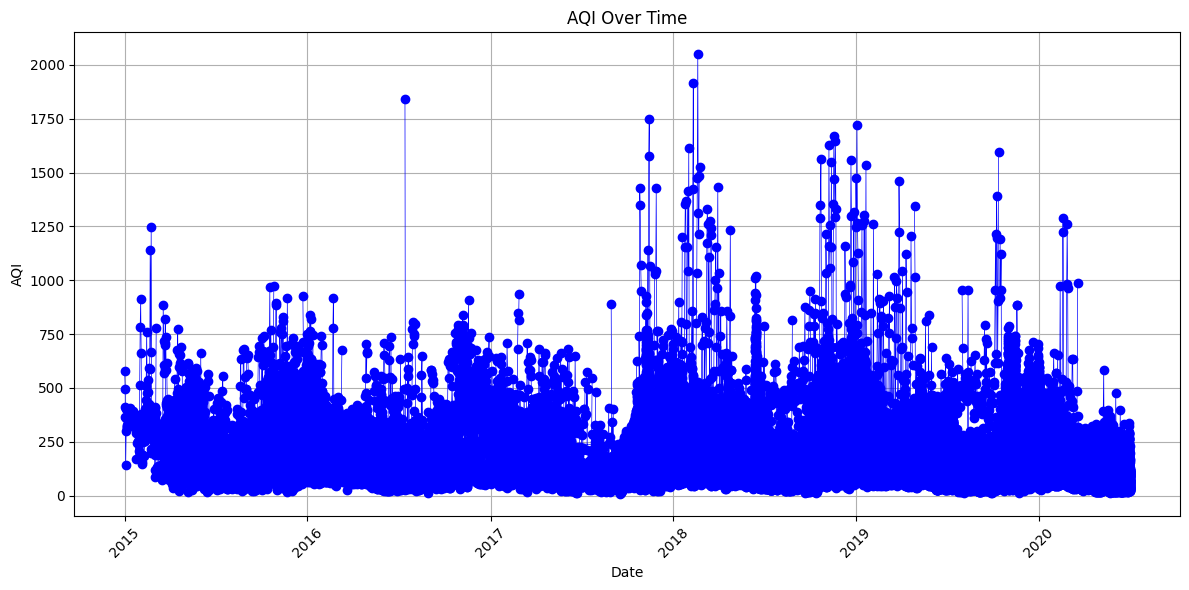

In [62]:
import matplotlib.pyplot as plt

# Plotting the AQI over time
plt.figure(figsize=(12, 6))
plt.plot(arima_df['Date'], arima_df['AQI'], color='blue', marker='o', linestyle='-', linewidth='0.5')
plt.title('AQI Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

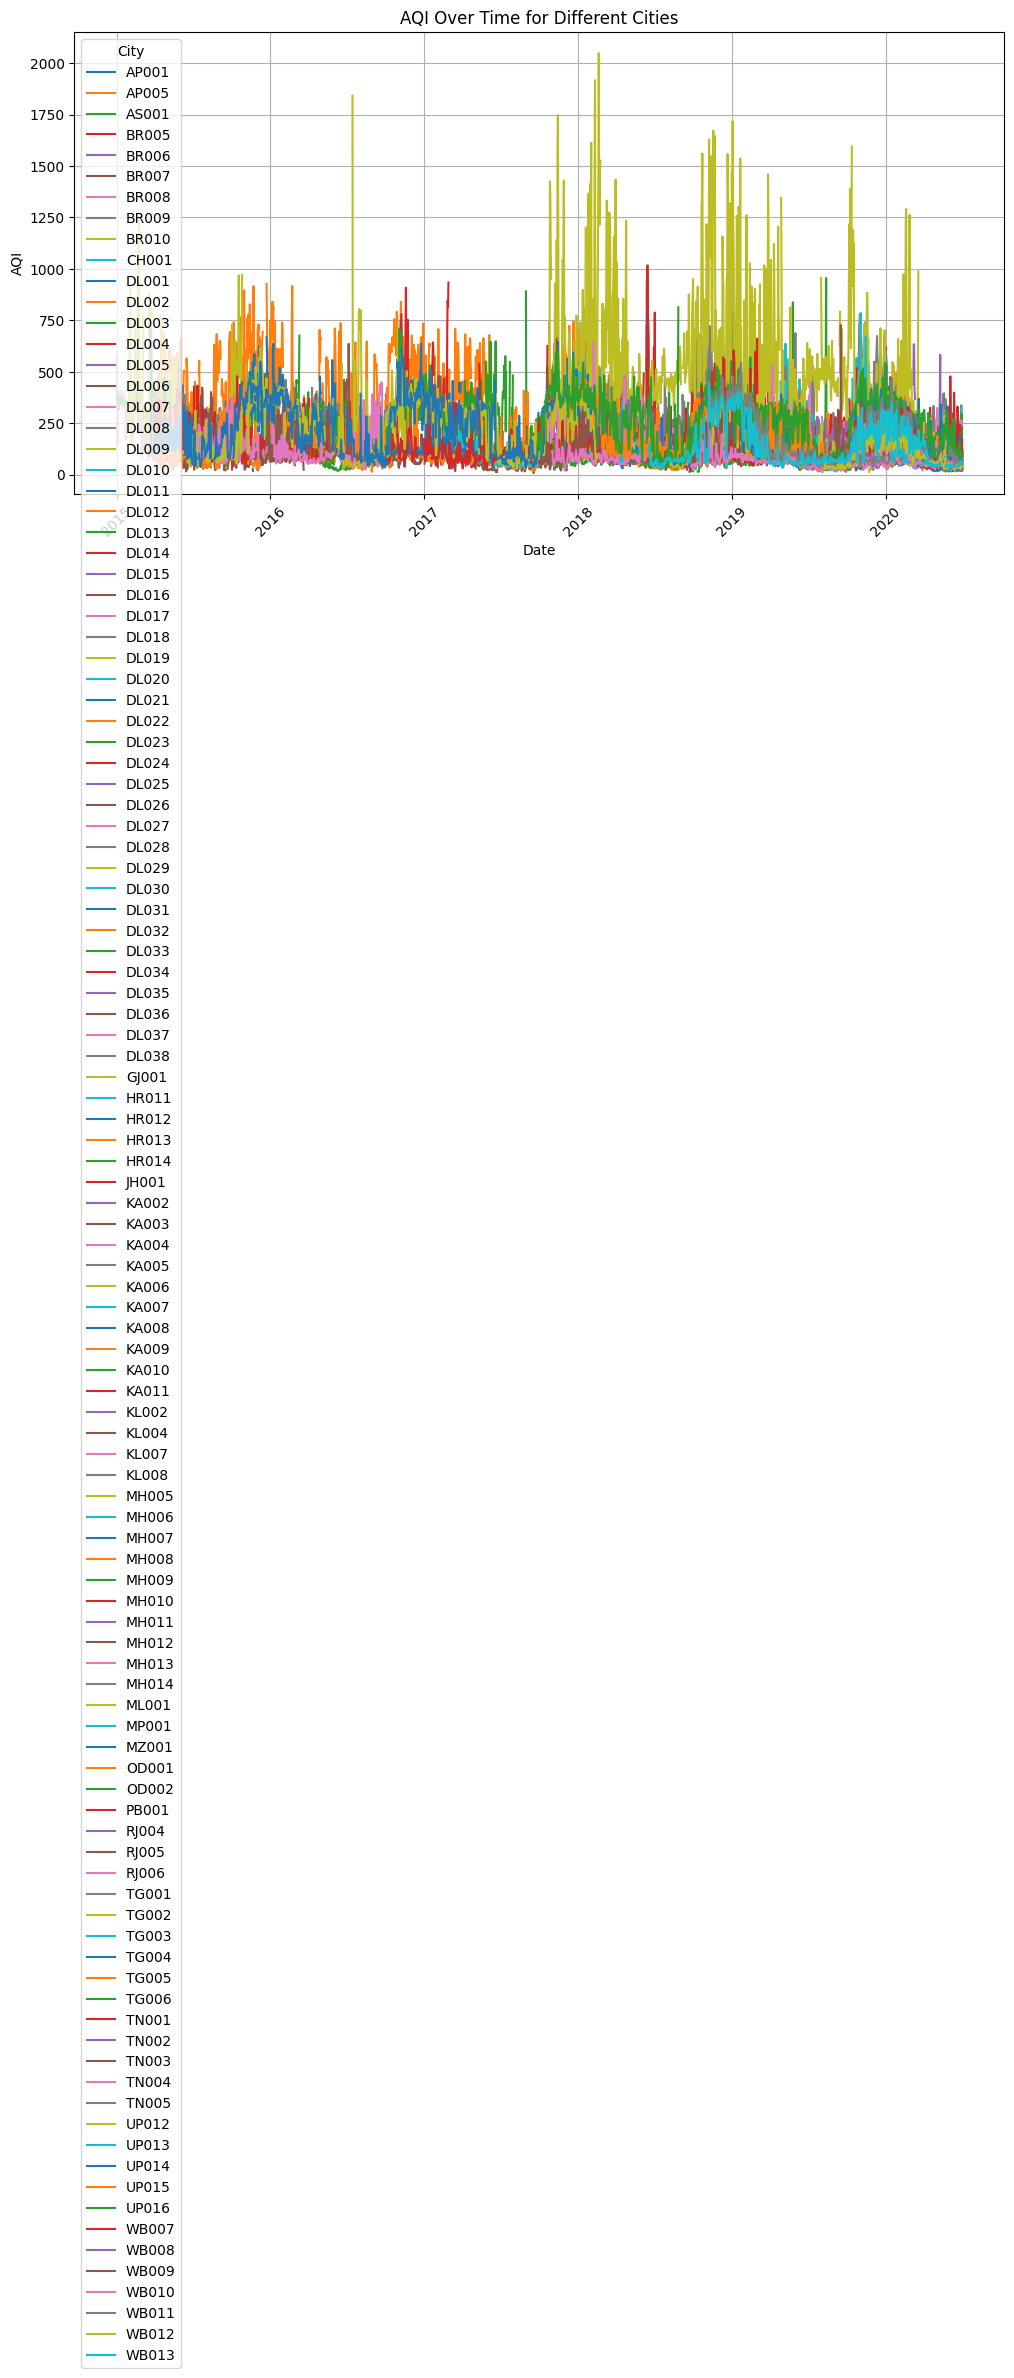

In [63]:
import matplotlib.pyplot as plt

# Plotting AQI for each city separately
plt.figure(figsize=(12, 6))

# Grouping data by 'StationId' and aggregating AQI at daily frequency
grouped_data = arima_df.groupby(['StationId', pd.Grouper(key='Date', freq='D')])['AQI'].mean().reset_index()

# Plotting each city's AQI data
for station, data in grouped_data.groupby('StationId'):
    plt.plot(data['Date'], data['AQI'], label=station)

# Adding title, labels, legend, and grid
plt.title('AQI Over Time for Different Cities')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.legend(title='City')
plt.grid(True)
plt.tight_layout()
plt.show()


In [64]:
arima_df.head()

,Date,AQI,StationId
0,2017-11-24,NaN,AP001
1,2017-11-25,184.0,AP001
2,2017-11-26,197.0,AP001
3,2017-11-27,198.0,AP001
4,2017-11-28,188.0,AP001


In [65]:
ts = arima_df.groupby(pd.PeriodIndex(arima_df['Date'], freq="M"))['AQI'].mean()

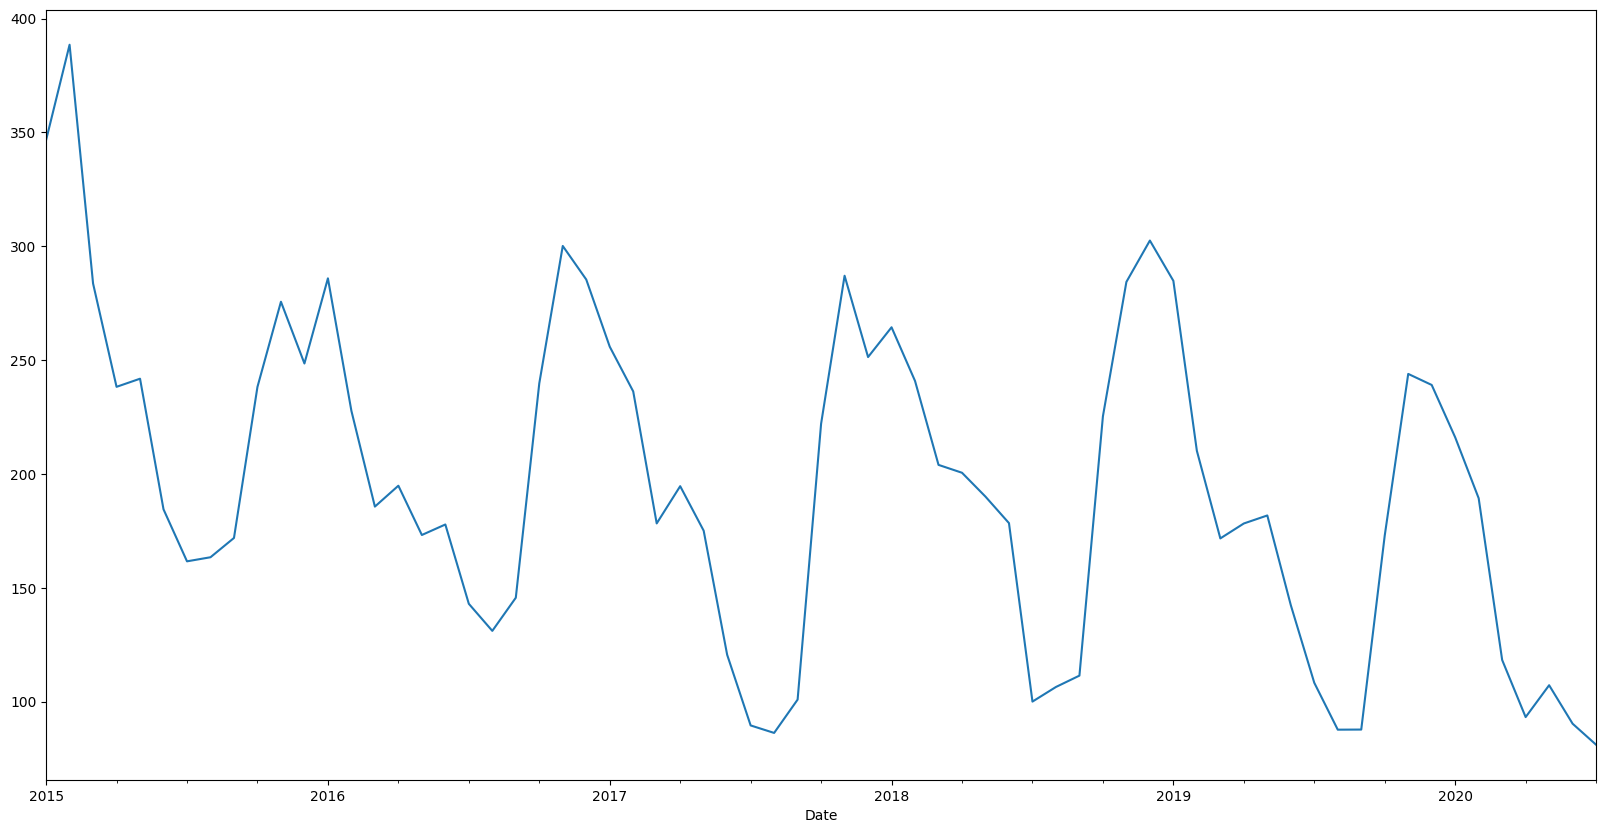

In [66]:
plt.figure(figsize = (20,10))
ts.plot()
plt.show()

In [67]:
# Doing adfuller test to identify if the data is stationary or not

In [68]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.224505
p-value: 0.662967


In [69]:
ts_train = ts[:50]
ts_test = ts[50:]

In [70]:
# from sklearn.model_selection import train_test_split

# # Split the time series data into training and testing sets
# ts_train, ts_test = train_test_split(ts, test_size=0.2, shuffle=False)

# # test_size=0.2 means 80% of the data will be used for training and 20% for testing.
# # shuffle=False ensures that the data is not shuffled before splitting, maintaining the chronological order.

# print("Training set size:", len(ts_train))
# print("Testing set size:", len(ts_test))

In [71]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [72]:
p = range(0,8)
q = range(0,8)
d = range(0,2)

pqd_combination = list(itertools.product(p,d,q))

error = []
pqd = []

for i in pqd_combination:
    A_model = ARIMA(ts_train, order = i).fit()
    predict = A_model.predict(len(ts_train),len(ts)-1)
    e = np.sqrt(mean_squared_error(ts_test,predict))
    pqd.append(i)
    error.append(e)

In [73]:
min = error[0]
index = 0
for i in range(1,len(error)-1):
    if(min > error[i]):
        min = error[i]
        index = i
        
print(error[index],' => ',pqd[index])

48.48382927506587  =>  (7, 1, 1)


In [74]:
# Fit the ARIMA model to the entire training data
model_ts = ARIMA(ts_train, order=pqd[index])
model_ts_fit = model_ts.fit()
print(model_ts_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                   50
Model:                 ARIMA(7, 1, 1)   Log Likelihood                -241.966
Date:                Fri, 16 Feb 2024   AIC                            501.931
Time:                        01:25:00   BIC                            518.957
Sample:                    01-31-2015   HQIC                           508.391
                         - 02-28-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7066      0.217      3.257      0.001       0.281       1.132
ar.L2         -0.2553      0.247     -1.036      0.300      -0.739       0.228
ar.L3         -0.1310      0.188     -0.697      0.4

In [75]:
# Make predictions for the testing period
arima_predict = model_ts_fit.predict(start=len(ts_train), end=len(ts_train) + len(ts_test) - 1)
print(arima_predict)

2019-03    174.832141
2019-04    176.314917
2019-05    154.639002
2019-06    144.255605
2019-07    136.501187
2019-08    135.122332
2019-09    180.340895
2019-10    231.939662
2019-11    256.770887
2019-12    264.505766
2020-01    242.766815
2020-02    211.082086
2020-03    193.602124
2020-04    173.783580
2020-05    154.999405
2020-06    147.490616
2020-07    147.303021
Freq: M, Name: predicted_mean, dtype: float64


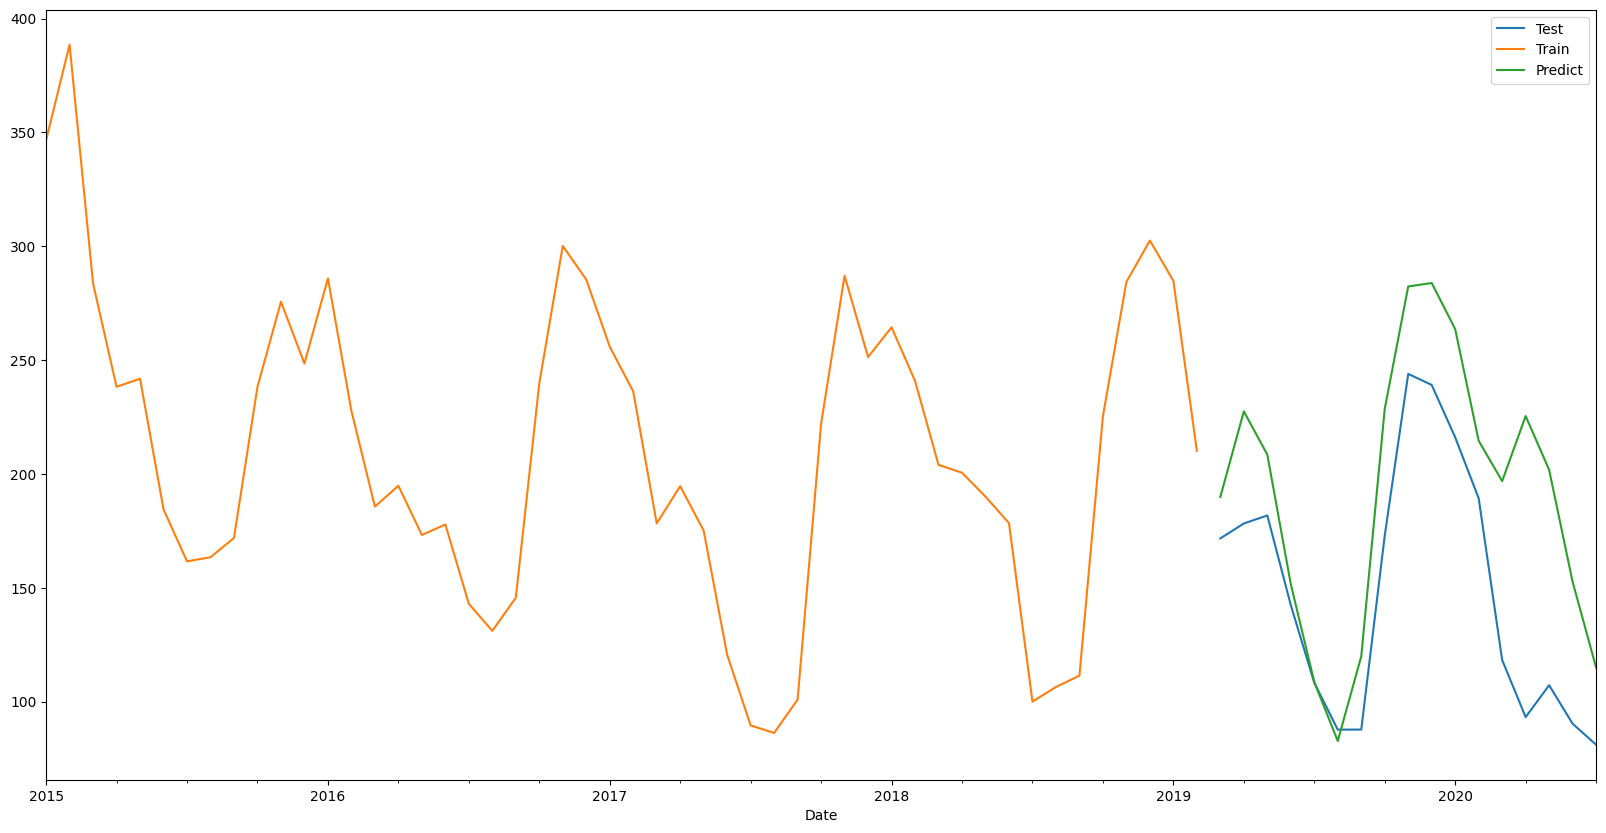

In [76]:
plt.figure(figsize = (20,10))
ts_test.plot(label = "Test")
ts_train.plot(label = "Train")
predict.plot(label = 'Predict')
plt.legend()
plt.show()

In [77]:
# Calculate evaluation metrics
def evaluate_arima_model(ts_test, arima_predict):
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(ts_test, arima_predict)
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(ts_test, arima_predict)
    
    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    
    # Calculate R-squared (R2) score
    r2 = r2_score(ts_test, arima_predict)
    
    return mae, mse, rmse, r2

# Call the function to evaluate the ARIMA model
mae, mse, rmse, r2 = evaluate_arima_model(ts_test, arima_predict)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 39.715745479849105
Mean Squared Error (MSE): 2350.681701173735
Root Mean Squared Error (RMSE): 48.48382927506587
R-squared (R2) Score: 0.18968693610158127


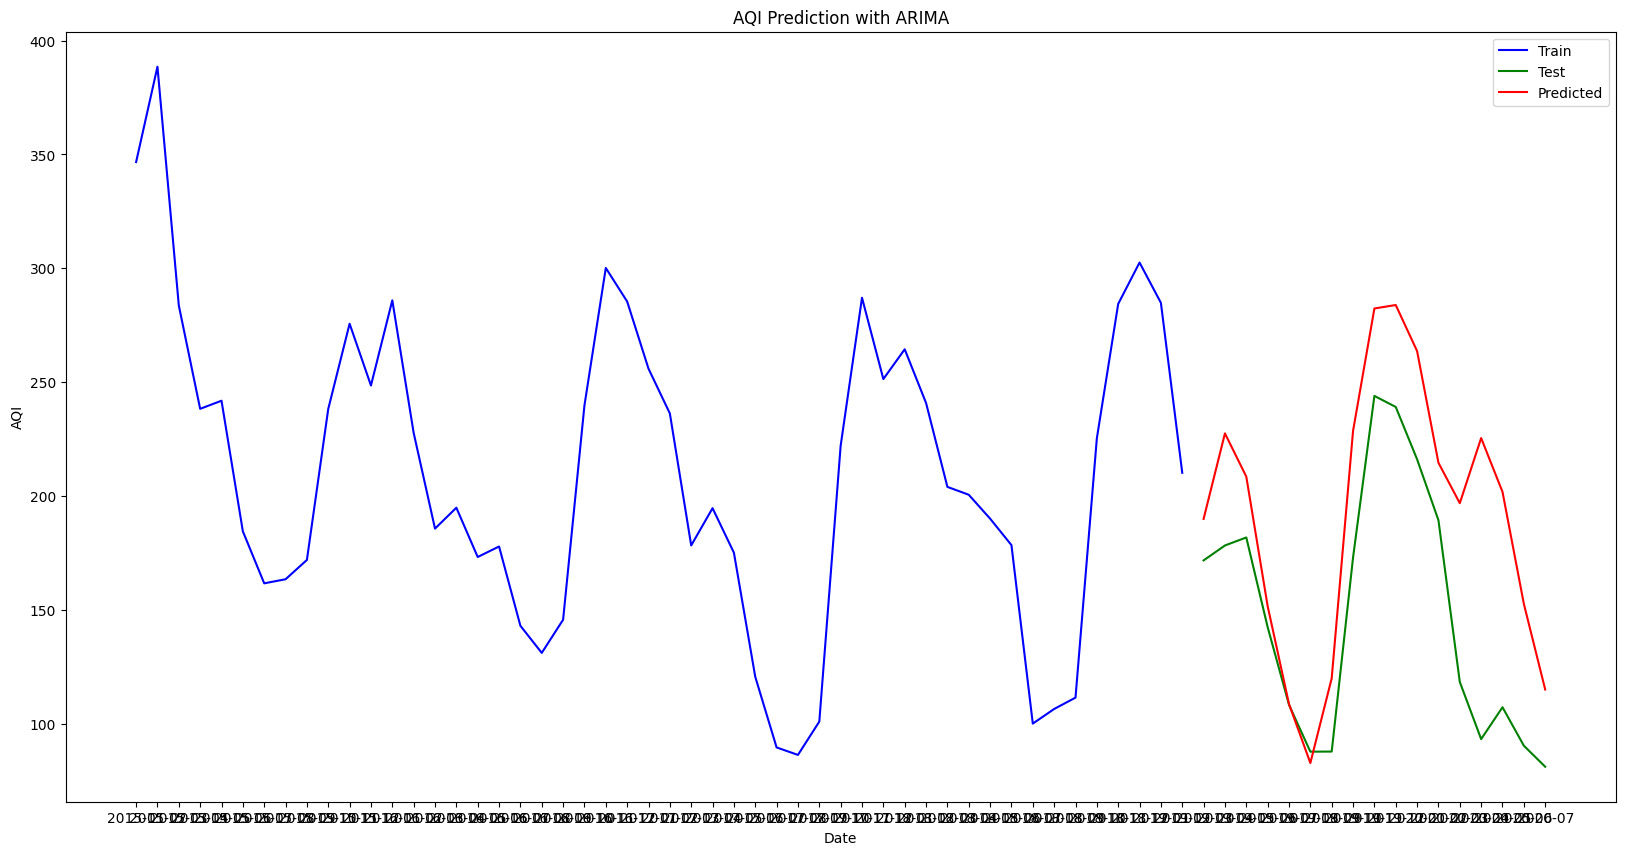

In [78]:
ts_train.index_str = ts_train.index.astype(str)
ts_test.index_str = ts_test.index.astype(str)
predict.index_str = predict.index.astype(str)

plt.figure(figsize=(20, 10))

# Plotting training data
plt.plot(ts_train.index_str, ts_train.values, label='Train', color='blue')

# Plotting testing data
plt.plot(ts_test.index_str, ts_test.values, label='Test', color='green')

# Plotting predicted values
plt.plot(predict.index_str, predict.values, label='Predicted', color='red')

# Adding labels, legend, and title
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Prediction with ARIMA')
plt.legend()

plt.show()

In [79]:
# SARIMAX

In [80]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -1.224505
p-value                         0.662967
#Lags Used                     10.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


In [81]:
# This time series is not stationary. Because P > 0.05 .So we want to take first differntioal for series

In [82]:
df1_ts = ts - ts.shift(1)
df1_ts=df1_ts.dropna()

In [83]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df1_ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput )

Results of Dickey-Fuller Test:
Test Statistic                -7.389944e+00
p-value                        8.050075e-11
#Lags Used                     9.000000e+00
Number of Observations Used    5.600000e+01
Critical Value (1%)           -3.552928e+00
Critical Value (5%)           -2.914731e+00
Critical Value (10%)          -2.595137e+00
dtype: float64


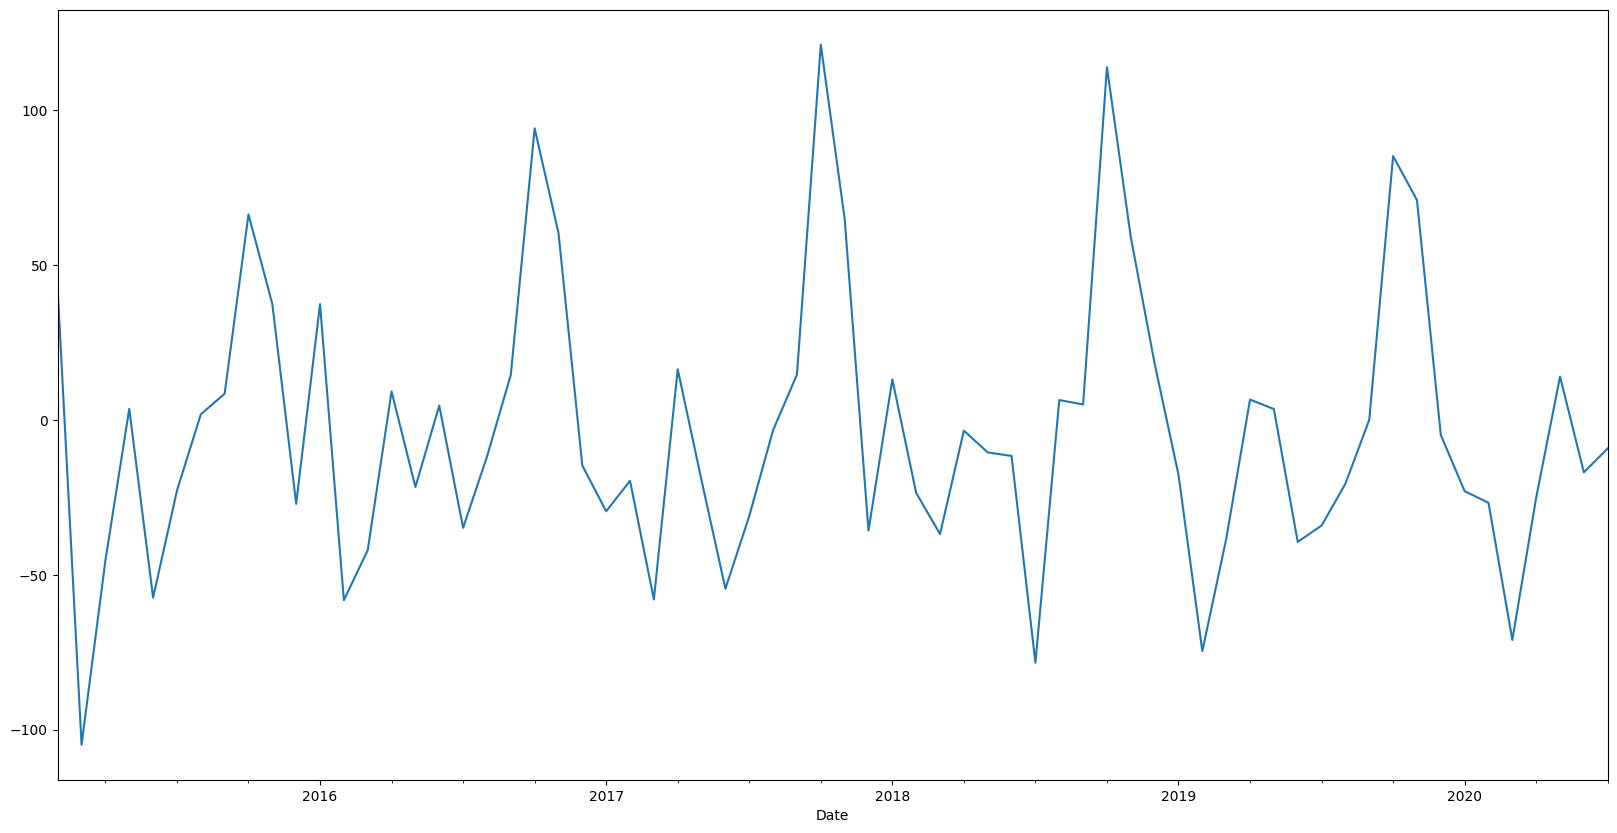

In [84]:
plt.figure(figsize = (20,10))
df1_ts.plot()
plt.show()

In [85]:
df1_ts_train = df1_ts[:50]
df1_ts_test = df1_ts[50:]

In [86]:
df_pdq = []
df_error = []

for i in pqd_combination:
    A_model = ARIMA(df1_ts_train,order= i).fit()
    predict = A_model.predict(len(df1_ts_train),len(df1_ts)-1)
    e = np.sqrt(mean_squared_error(df1_ts_test,predict))
    df_pdq.append(i)
    df_error.append(e)

In [87]:
min = df_error[0]
index = 0
for i in range(1,len(df_error)-1):
    if(min > df_error[i]):
        min = df_error[i]
        index = i
        
print(df_error[index],' => ',df_pdq[index])

20.38738070808806  =>  (7, 0, 3)


In [88]:
import statsmodels.api as sm
sarima_model = sm.tsa.statespace.SARIMAX(df1_ts_train, trend='n', order=(7,0,3), seasonal_order=(1,1,1,12))
s_results = sarima_model.fit()
print(s_results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                  AQI   No. Observations:                   50
Model:             SARIMAX(7, 0, 3)x(1, 1, [1], 12)   Log Likelihood                -176.686
Date:                              Fri, 16 Feb 2024   AIC                            379.373
Time:                                      01:25:30   BIC                            400.661
Sample:                                  02-28-2015   HQIC                           386.947
                                       - 03-31-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0910      2.144      0.042      0.966      -4.112       4.294
ar.L2         -0.99

In [89]:
s_pred = s_results.predict(start = len(df1_ts_train),end = len(df1_ts)-1)

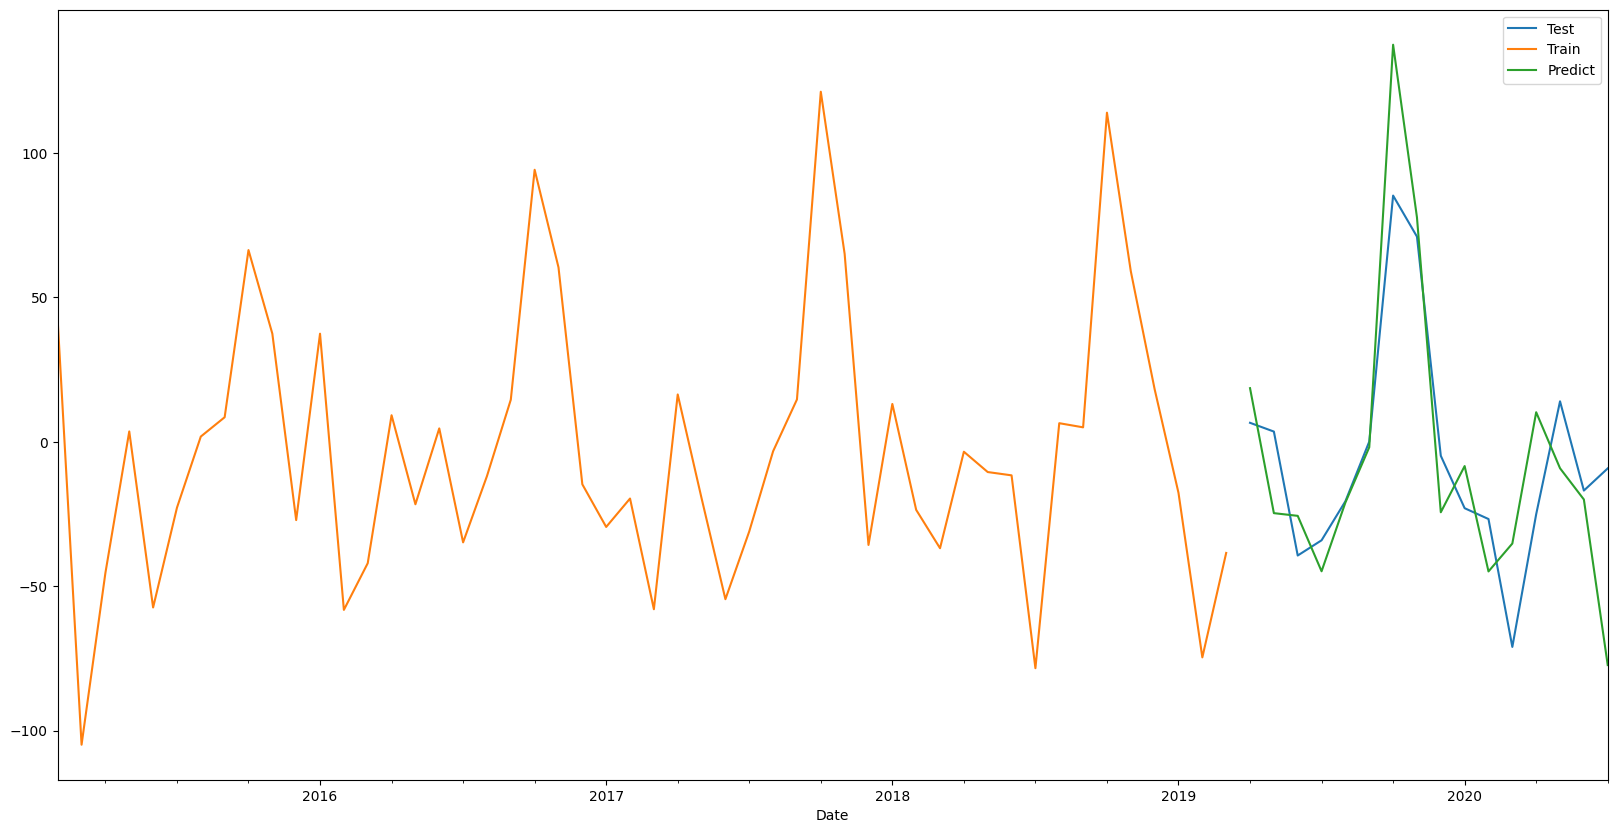

In [90]:
plt.figure(figsize = (20,10))
df1_ts_test.plot(label = "Test")
df1_ts_train.plot(label = "Train")
s_pred.plot(label = 'Predict')
plt.legend()
plt.show()

In [91]:
# Calculate evaluation metrics
def evaluate_sarima_model(df1_ts_test, s_pred):
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(df1_ts_test, s_pred)
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(df1_ts_test, s_pred)
    
    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    
    # Calculate R-squared (R2) score
    r2 = r2_score(df1_ts_test, s_pred)
    
    return mae, mse, rmse, r2

# Call the function to evaluate the sarima model
mae, mse, rmse, r2 = evaluate_sarima_model(df1_ts_test, s_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 21.478994274289533
Mean Squared Error (MSE): 790.6861381009726
Root Mean Squared Error (RMSE): 28.119141845030985
R-squared (R2) Score: 0.4375236059309152


In [92]:
# LSTM

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [94]:
lstm_df = pd.read_csv("station_day.csv")

In [95]:
lstm_df["Date"]= pd.to_datetime(lstm_df["Date"])

In [96]:
lstm_df.drop(['AQI_Bucket', 'StationId'], axis=1, inplace=True)

In [97]:
df_cleaned=lstm_df.dropna()

In [98]:
df_cleaned.shape

(10314, 14)

In [99]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10314 entries, 1 to 106147
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     10314 non-null  datetime64[ns]
 1   PM2.5    10314 non-null  float64       
 2   PM10     10314 non-null  float64       
 3   NO       10314 non-null  float64       
 4   NO2      10314 non-null  float64       
 5   NOx      10314 non-null  float64       
 6   NH3      10314 non-null  float64       
 7   CO       10314 non-null  float64       
 8   SO2      10314 non-null  float64       
 9   O3       10314 non-null  float64       
 10  Benzene  10314 non-null  float64       
 11  Toluene  10314 non-null  float64       
 12  Xylene   10314 non-null  float64       
 13  AQI      10314 non-null  float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 1.2 MB


In [100]:
# Split data into train and test sets
train_size = int(len(df_cleaned) * 0.8)
train, test = df_cleaned[:train_size], df_cleaned[train_size:]

In [101]:
# Scaling data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_cleaned['AQI'].values.reshape(-1,1))
seq_length = 10

In [102]:
# Define function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, seq_length)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [103]:
# Define LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

In [104]:
# Training LSTM model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
predictions_lstm = model_lstm.predict(X_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm).flatten()
y_test = scaler.inverse_transform(y_test).flatten()

Epoch 1/100
207/207 [==============================] - 2s 6ms/step - loss: 0.0081 - val_loss: 0.0012
Epoch 2/100
207/207 [==============================] - 1s 5ms/step - loss: 0.0040 - val_loss: 0.0011
Epoch 3/100
207/207 [==============================] - 1s 5ms/step - loss: 0.0036 - val_loss: 9.8056e-04
Epoch 4/100
207/207 [==============================] - 1s 5ms/step - loss: 0.0032 - val_loss: 9.8958e-04
Epoch 5/100
207/207 [==============================] - 1s 5ms/step - loss: 0.0029 - val_loss: 8.7100e-04
Epoch 6/100
207/207 [==============================] - 1s 5ms/step - loss: 0.0027 - val_loss: 8.0211e-04
Epoch 7/100
207/207 [==============================] - 1s 6ms/step - loss: 0.0027 - val_loss: 9.5000e-04
Epoch 8/100
207/207 [==============================] - 1s 6ms/step - loss: 0.0027 - val_loss: 8.2418e-04
Epoch 9/100
207/207 [==============================] - 1s 5ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 10/100
207/207 [==============================] - 1s 5ms/step

In [105]:
# Calculate evaluation metrics
rmse_lstm = sqrt(mean_squared_error(y_test, predictions_lstm))
mse_lstm = mean_squared_error(y_test, predictions_lstm)
mae_lstm = mean_absolute_error(y_test, predictions_lstm)
r2_lstm = r2_score(y_test, predictions_lstm)

print('LSTM RMSE:', rmse_lstm)
print('LSTM MSE:', mse_lstm)
print('LSTM MAE:', mae_lstm)
print('LSTM R2 Score:', r2_lstm)

LSTM RMSE: 29.66782496555303
LSTM MSE: 880.1798381866918
LSTM MAE: 18.83296763089826
LSTM R2 Score: 0.8142296730483787


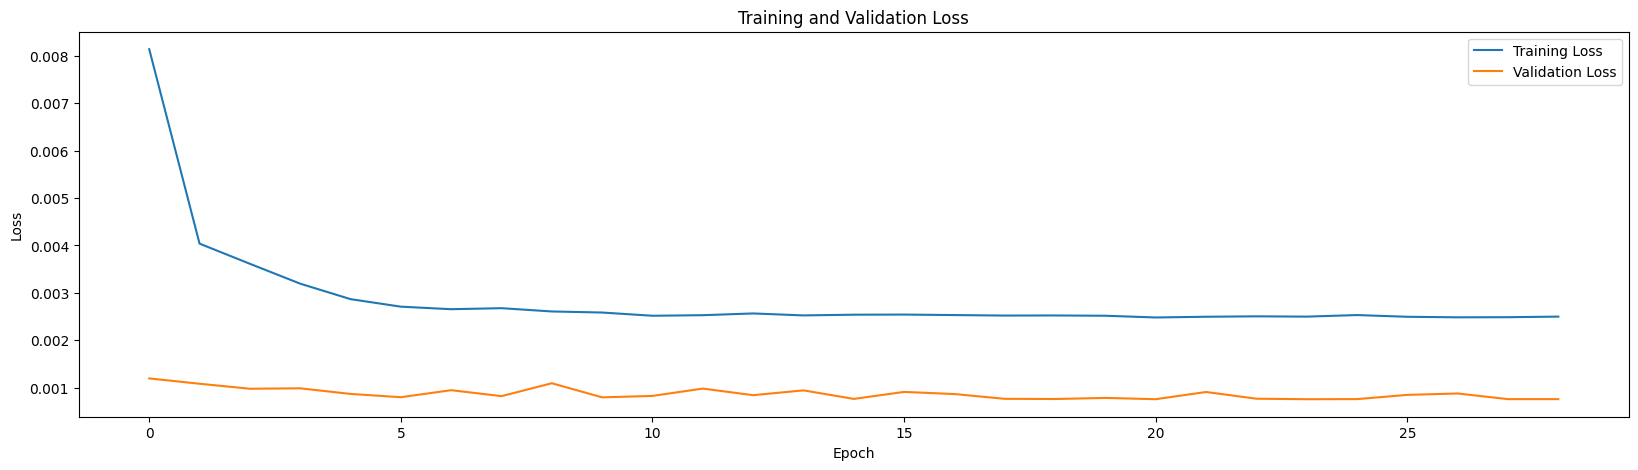

In [106]:
# Plotting training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()